In [1]:
from models import TSAINetwork
import torch
import torchvision

In [2]:
ts = TSAINetwork()

In [3]:
sample_path = "./../data\Defects\Image0\Image0.jpg"
mask_path = "./../data\DefectsMasks\Image0_0_star.jpg"

sample = torchvision.io.read_image(sample_path)
mask = torchvision.io.read_image(mask_path, mode=torchvision.io.ImageReadMode.GRAY)

In [4]:
print(sample.shape)
print(mask.shape)

torch.Size([1, 1024, 1280])
torch.Size([1, 1024, 1280])


In [5]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import numpy as np

plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

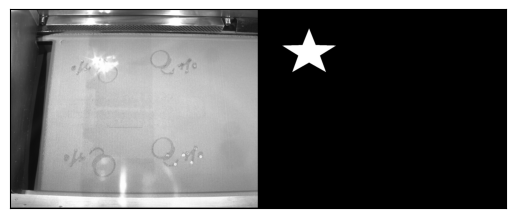

In [6]:
lst = [sample, mask]
grid = torchvision.utils.make_grid(lst)

show(grid)

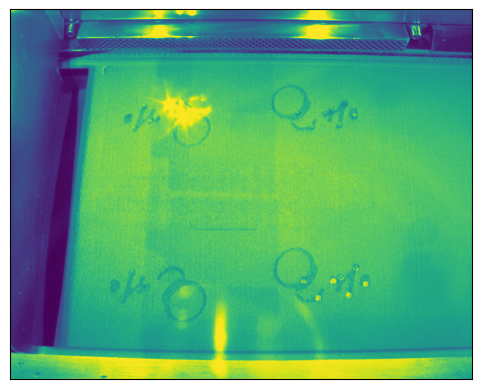

In [7]:
show(sample)

In [10]:
joined = torch.cat((sample, mask), 0)
print(joined.shape)

torch.Size([2, 1024, 1280])


In [11]:
print(grid.shape)

torch.Size([3, 1028, 2566])


In [12]:
joined = joined.float()
t = torchvision.transforms.Resize((512, 512))
j = t(joined)

j.shape

c:\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([2, 512, 512])

In [13]:
res = ts.forward(j)

torch.Size([1, 512, 512])


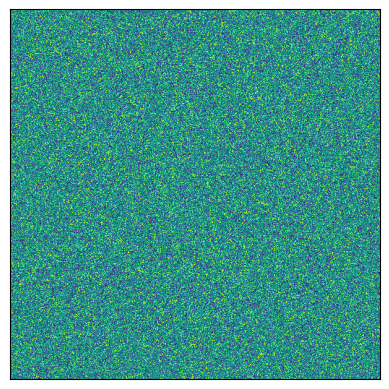

In [14]:
print(res.shape)
show(res)

In [16]:
from modules import HarmonizationModule

hm = HarmonizationModule(10, 1e-4, "sgd", "step")

hm.training_step((t(sample.float()), j))

c:\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
c:\Python311\Lib\site-packages\lightning\pytorch\core\module.py:447: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`


{'loss': tensor(54027.8906, grad_fn=<MseLossBackward0>)}

In [ ]:
from src.datasets import HarmonizationDataset

